In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from pydub.utils import mediainfo


C:\Users\singh\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
speech = AudioSegment.from_wav('arctic_a0005.wav') # Read audio data from file
x = speech.get_array_of_samples() # samples x(t)
x_sr = speech.frame_rate # sampling rate f - see slide 24 in week 7 lecture slides
print('Sampling rate: ', x_sr)
print('Number of samples: ', len(x))

Sampling rate:  16000
Number of samples:  22640


In [3]:
duration = librosa.get_duration(filename = 'arctic_a0005.wav')
n_samples = duration * x_sr
print('duration: ', duration)
print('n_samples: ', n_samples)

duration:  1.415
n_samples:  22640.0


Text(0, 0.5, 'Amplitude')

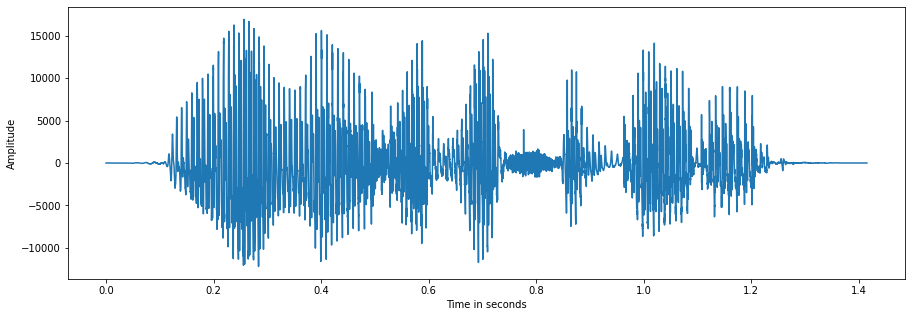

In [4]:
x_range = np.linspace(0, duration, len(x))
plt.figure(figsize = (15, 5))
plt.plot(x_range, x)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')

In [5]:
mid_point = int(len(x) / 2)
x1 = x[0:mid_point]
x2 = x[mid_point:len(x)]
x1_audio = AudioSegment(
    #raw data
    data = x1,
    #2 bytes = 16 bit samples
    sample_width = 2,
    #frame rate
    frame_rate = x_sr,
    #channels = 1 for mono and 2 for stereo
    channels = 1)

x2_audio = AudioSegment(#raw data
    data = x2,
    #2 bytes = 16 bit samples
    sample_width = 2,
    #frame rate
    frame_rate = x_sr,
    #channels = 1 for mono and 2 for stereo
    channels = 1)
x1_audio.export('arctic_a0005_1.wav', format = 'wav')
x2_audio.export('arctic_a0005_2.wav', format = 'wav')

<_io.BufferedRandom name='arctic_a0005_2.wav'>

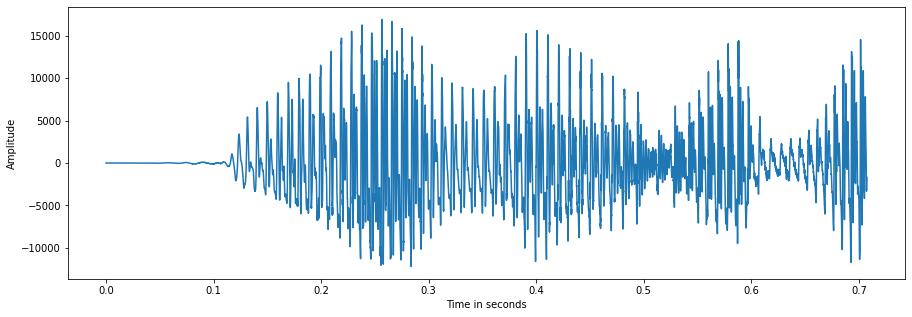

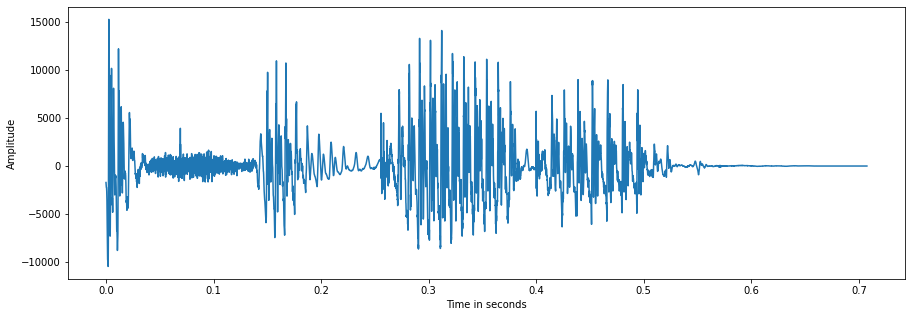

In [6]:
###Task 1. Visualize signals in time domain
x1_duration = len(x1) / x_sr
x1_range = np.linspace(0, x1_duration, len(x1))
plt.figure(figsize = (15, 5))
plt.plot(x1_range, x1)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.show()

x2_duration = len(x2) / x_sr
x2_range = np.linspace(0, x2_duration, len(x2))
plt.figure(figsize = (15, 5))
plt.plot(x2_range, x2)
plt.xlabel('Time in seconds')
plt.ylabel('Amplitude')
plt.show()

#### Fourier Transform

In [7]:
#range of frequencies of interest for speech signal.
#It can be any positive value, but should be a power of 2
freq_range = 1024
#window size: the number of samples per frame
#each frame is of 30ms
win_length = int(x_sr * 0.03)
#number of samples between tww consecutive frames
hop_length = int(win_length / 2)
#windowing technique
window = 'hann'
#bydefault, hop_length = win_length / 4
X = librosa.stft(np.float32(x), n_fft = freq_range, window = window, hop_length = hop_length, win_length = win_length)
print (X.shape)
print (n_samples/hop_length)

(513, 95)
94.33333333333333


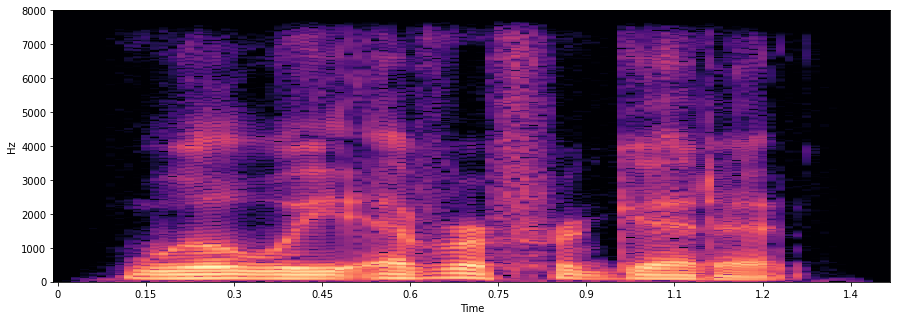

In [8]:
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(
    #spectrogram
    Xdb,
    #sampling rate
    sr = x_sr,
    #label for horizontal axis
    x_axis = 'time',
    #presentation scale
    y_axis = 'linear',
    #hop_length
    hop_length = hop_length)


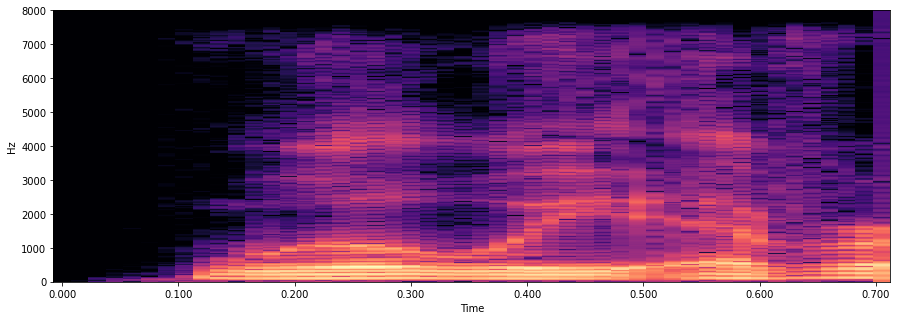

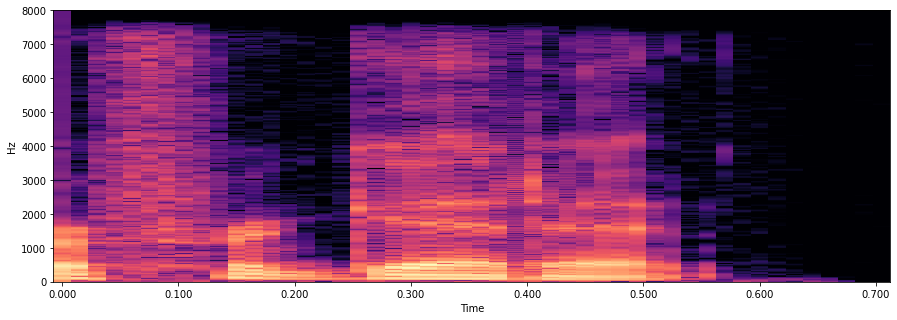

In [9]:
#### Task 2. Create spectrogram for x1 and x2
X1 = librosa.stft(np.float32(x1), 
                 n_fft = freq_range, 
                 window = window, 
                 hop_length = hop_length, 
                 win_length = win_length)
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
X1_db = librosa.amplitude_to_db(abs(X1))
librosa.display.specshow(
    #spectrogram
    X1_db,
    #sampling rate
    sr = x_sr,
    #label for horizontal axis
    x_axis = 'time',
    #presentation scale
    y_axis = 'linear',
    #hop_length
    hop_length = hop_length)

X2 = librosa.stft(np.float32(x2), 
                 n_fft = freq_range, 
                 window = window, 
                 hop_length = hop_length, 
                 win_length = win_length)
plt.figure(figsize = (15, 5))
#convert the amplitude to decibels, just for illustration purpose
X2_db = librosa.amplitude_to_db(abs(X2))
librosa.display.specshow(
    #spectrogram
    X2_db,
    #sampling rate
    sr = x_sr,
    #label for horizontal axis
    x_axis = 'time',
    #presentation scale
    y_axis = 'linear',
    #hop_length
    hop_length = hop_length)

In [10]:
#number of samples
N = 800
#sample spacing
T = 1.0 / N
t = np.linspace(0.0, N*T, N) #t : time steps
s1 = np.sin(50.0 * 2.0 * np.pi * t)
s2 = 0.5 * np.sin(80.0 * 2.0 * np.pi * t)
s = s1 + s2

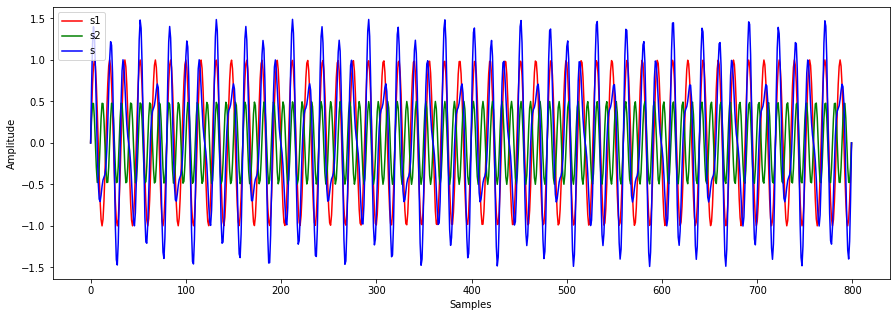

In [11]:
plt.figure(figsize = (15, 5))
plt.plot(s1, label = 's1', color = 'r')
plt.plot(s2, label = 's2', color = 'g')
plt.plot(s, label = 's', color = 'b')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.legend(loc = "upper left")

C:\Users\singh\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=800
  return f(*args, **kwargs)


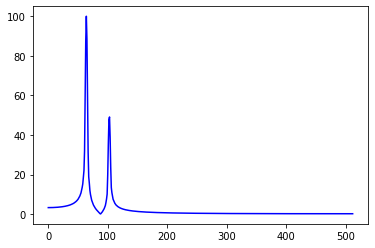

In [12]:
S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = N, win_length = N)
S_0 = S[:, 0]
mag_S_0 = np.abs(S_0)
plt.plot(mag_S_0, color = 'b')

In [13]:
print (S.shape)

(513, 2)


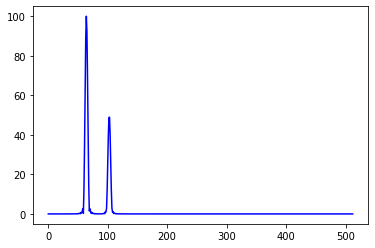

In [14]:
#we define a window length m with less number of samples
m = 400
S = librosa.stft(s, n_fft = 1024, window = 'hann', hop_length = int(m / 2), win_length = m)
#we take S_1, which is an intermediate frame.
S_1 = S[:, 1]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')

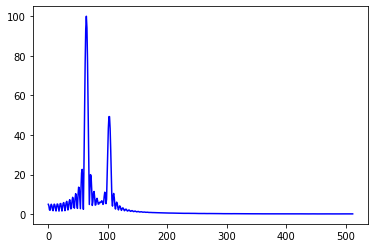

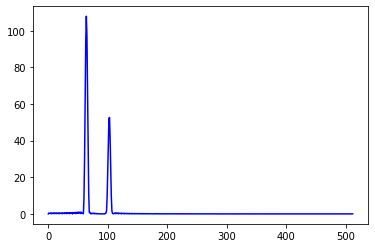

In [15]:
S_boxcar = librosa.stft(s, n_fft = 1024, window = 'boxcar', hop_length = int(m / 2), win_length = m)
S_1 = S_boxcar[:, 0]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')
plt.show()

S_hamming = librosa.stft(s, n_fft = 1024, window = 'hamming', hop_length = int(m / 2), win_length = m)
S_1 = S_hamming[:, 3]
mag_S_1 = np.abs(S_1)
plt.plot(mag_S_1, color = 'b')
plt.show()